In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import HeatMap

In [59]:
plt.style.use('ggplot')
sns.set_palette("husl")

In [60]:
df = pd.read_csv('dataset_feature_engineering.csv')

In [61]:
def identify_mobile_transactions(df):
    # common mobile categories
    mobile_categories = ['shopping_net', 'food_dining', 'entertainment', 'travel']
    
    # patterns of mobile transactions
    non_business_hours = (df['hour'] < 9) | (df['hour'] > 17)
    
    # significant distance between client and merchant
    significant_distance = df['dist_between_client_and_merch'] > 50
    
    # combine criteria to identify mobile transactions
    df['is_mobile'] = (
        (df['category'].isin(mobile_categories)) & 
        (non_business_hours | significant_distance)
    )
    
    return df

In [62]:
df = identify_mobile_transactions(df)
# get mobile transactions
mobile_df = df.loc[df['is_mobile']]

## Exploratory analysis

In [63]:
print(f"Shape: {mobile_df.shape}")

Shape: (420304, 36)


In [64]:
print(mobile_df.dtypes)


cc_num                               int64
merchant                            object
category                            object
amt                                float64
first                               object
last                                object
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
job                                 object
dob                                 object
trans_num                           object
unix_time                            int64
merch_lat                          float64
merch_long                         float64
is_fraud                             int64
amt_month                          float64
amt_year                           float64
amt_month_s

In [65]:
categorical_columns = ['merchant', 'category', 'first_time_at_merchant']
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
                    'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
                    'dist_between_client_and_merch', 'trans_month', 'trans_day',
                    'hour', 'year', 'times_shopped_at_merchant',
                    'times_shopped_at_merchant_year', 'times_shopped_at_merchant_month',
                    'times_shopped_at_merchant_day']

In [66]:
print(mobile_df.isnull().sum())

cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
t

### Categorical features

In [67]:
for col in categorical_columns:
    print(f"\n--- {col} ---")
    print(f"Unique values: {mobile_df[col].nunique()}")
    print("Value distribution:")
    print(mobile_df[col].value_counts(normalize=True).head())


--- merchant ---
Unique values: 200
Value distribution:
merchant
fraud_Gleason-Macejkovic                  0.006336
fraud_Hills-Witting                       0.006331
fraud_Stanton, Jakubowski and Baumbach    0.006326
fraud_Zboncak, Rowe and Murazik           0.006319
fraud_Terry-Huel                          0.006293
Name: proportion, dtype: float64

--- category ---
Unique values: 4
Value distribution:
category
shopping_net     0.305772
entertainment    0.288820
food_dining      0.281427
travel           0.123982
Name: proportion, dtype: float64

--- first_time_at_merchant ---
Unique values: 2
Value distribution:
first_time_at_merchant
False    0.679908
True     0.320092
Name: proportion, dtype: float64


### Numerical features

In [68]:
for col in numerical_columns:
    print(f"\n--- {col} ---")
    print(f"Mean: {mobile_df[col].mean():.2f}")
    print(f"Median: {mobile_df[col].median():.2f}")
    print(f"Standard Deviation: {mobile_df[col].std():.2f}")
    print(f"Range: {mobile_df[col].min():.2f} - {mobile_df[col].max():.2f}")
    print(f"Skewness: {mobile_df[col].skew():.2f}")
    print(f"Kurtosis: {mobile_df[col].kurtosis():.2f}")


--- amt ---
Mean: 73.68
Median: 24.82
Standard Deviation: 260.45
Range: 1.00 - 28948.90
Skewness: 35.60
Kurtosis: 2415.33

--- lat ---
Mean: 38.51
Median: 39.35
Standard Deviation: 5.06
Range: 20.03 - 66.69
Skewness: -0.21
Kurtosis: 0.71

--- long ---
Mean: -90.21
Median: -87.46
Standard Deviation: 13.71
Range: -165.67 - -67.95
Skewness: -1.14
Kurtosis: 1.79

--- city_pop ---
Mean: 90825.83
Median: 2523.00
Standard Deviation: 305304.37
Range: 23.00 - 2906700.00
Skewness: 5.49
Kurtosis: 36.14

--- merch_lat ---
Mean: 38.51
Median: 39.35
Standard Deviation: 5.10
Range: 19.03 - 67.51
Skewness: -0.20
Kurtosis: 0.69

--- merch_long ---
Mean: -90.21
Median: -87.42
Standard Deviation: 13.72
Range: -166.67 - -66.95
Skewness: -1.14
Kurtosis: 1.78

--- amt_month ---
Mean: 4204.84
Median: 3115.14
Standard Deviation: 3938.05
Range: 1.00 - 43261.89
Skewness: 1.96
Kurtosis: 6.10

--- amt_year ---
Mean: 45479.68
Median: 37454.51
Standard Deviation: 36123.62
Range: 1.02 - 218941.76
Skewness: 1.17
Kur

### Distributions

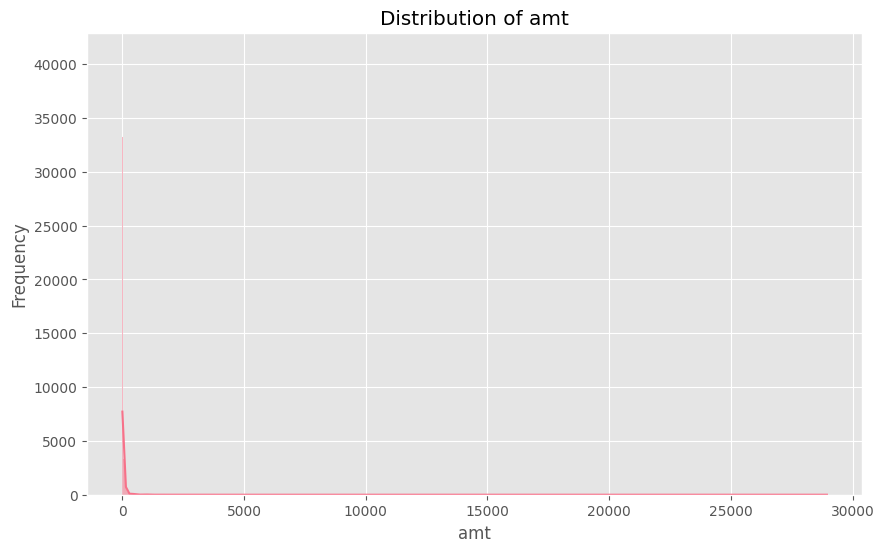

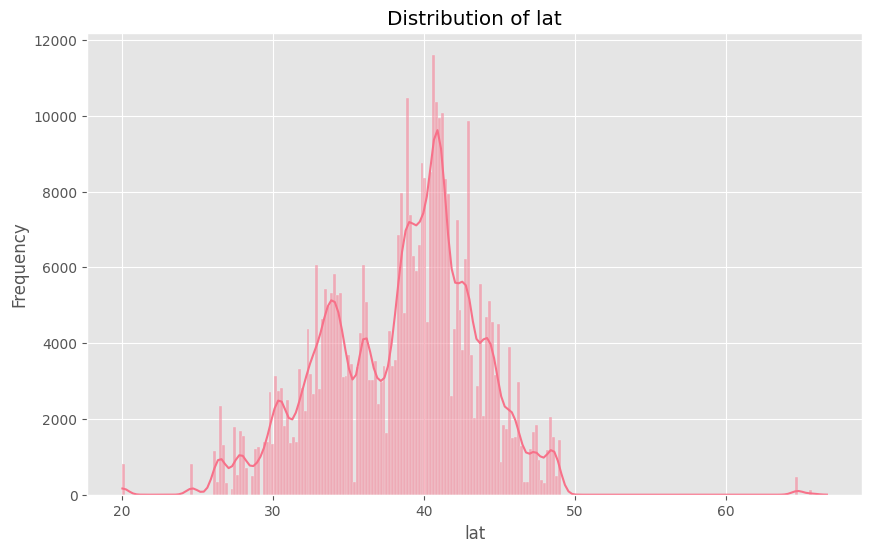

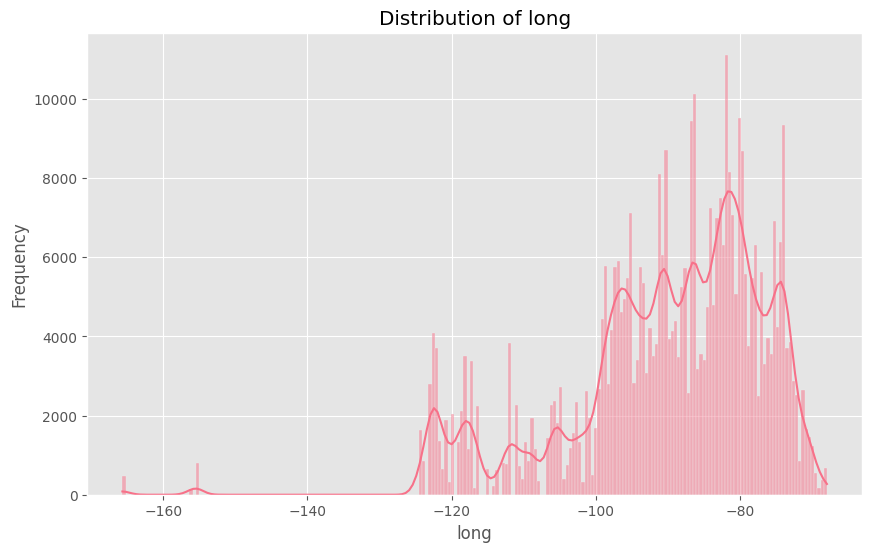

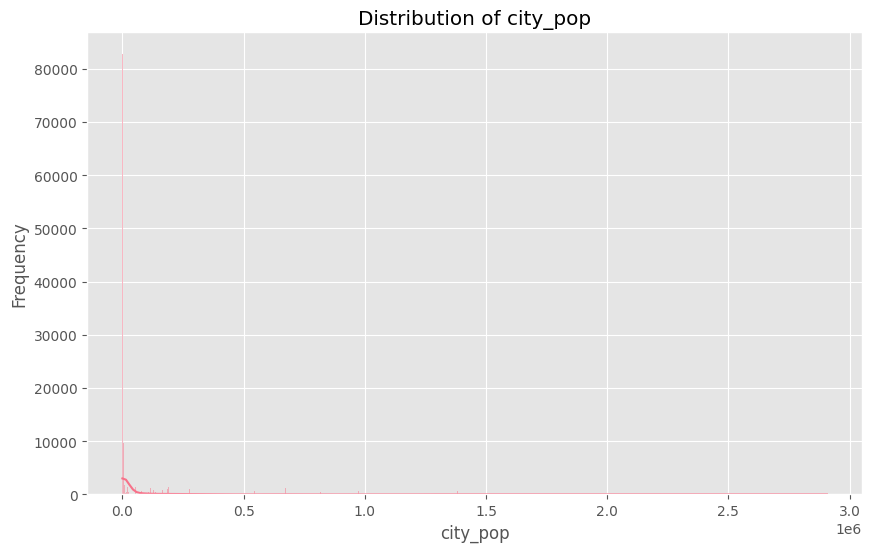

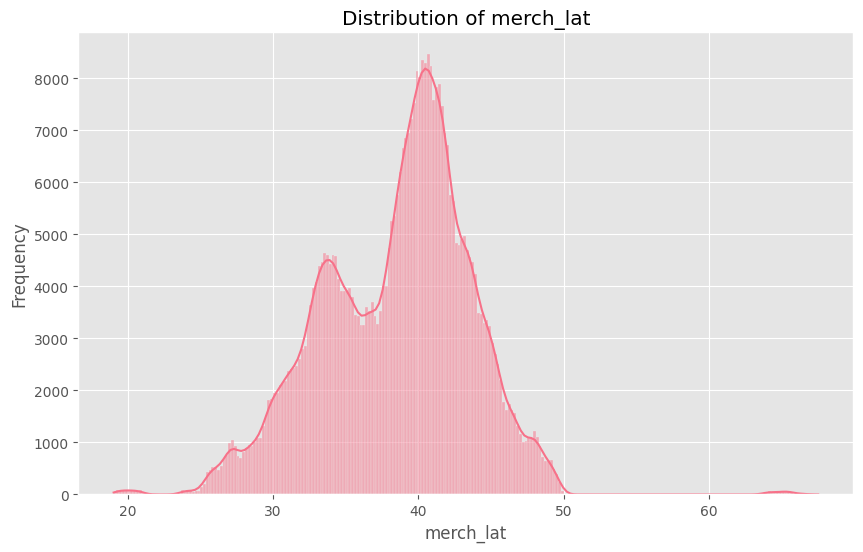

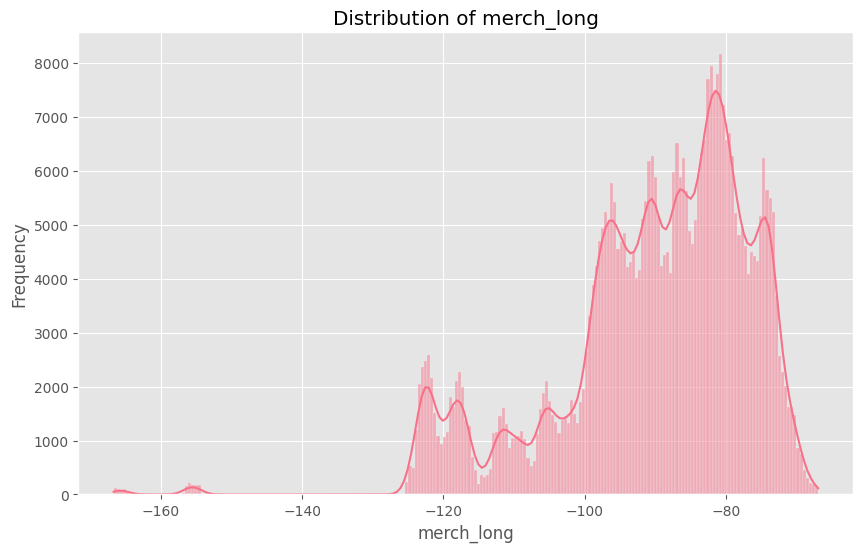

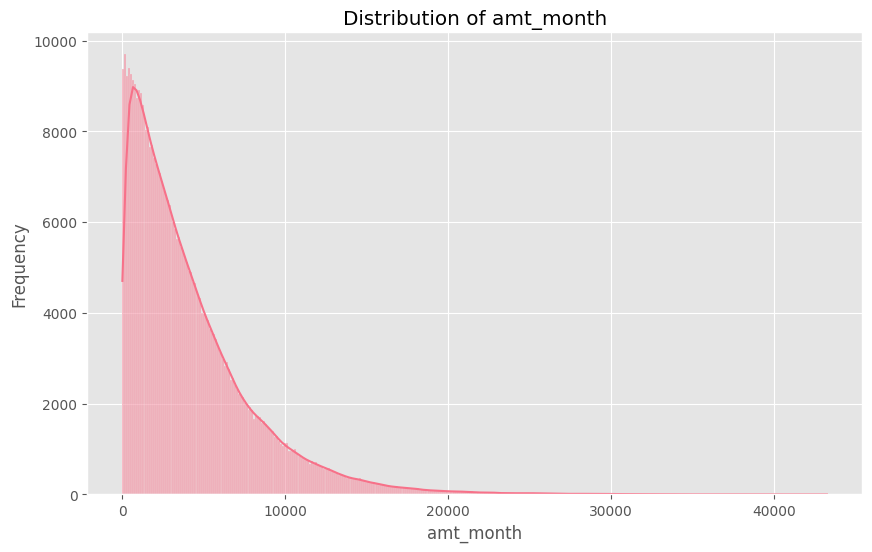

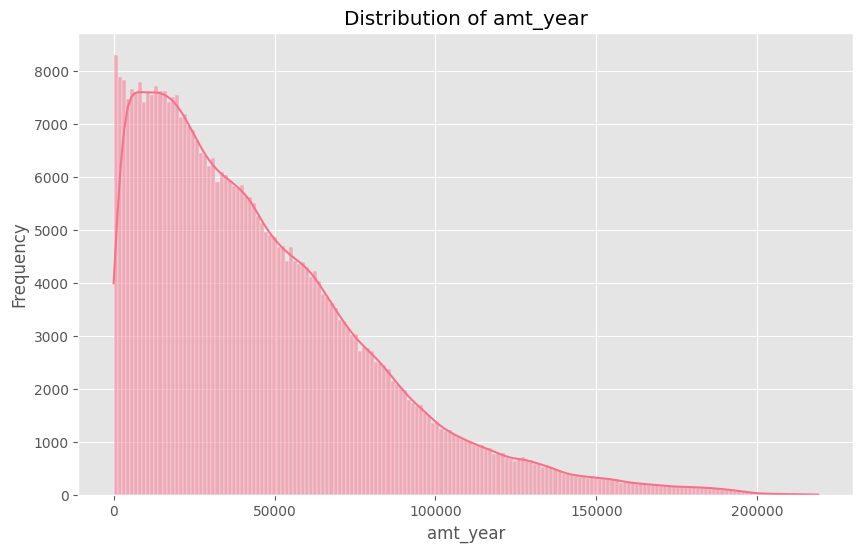

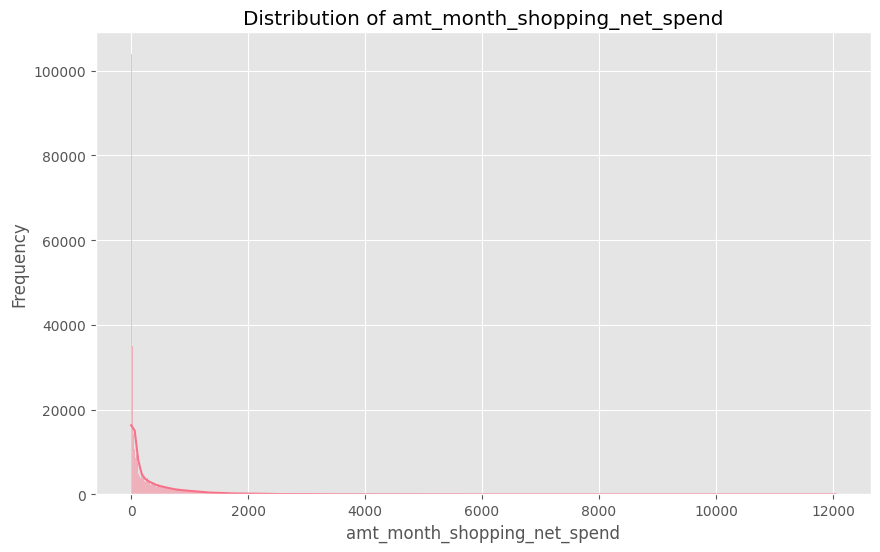

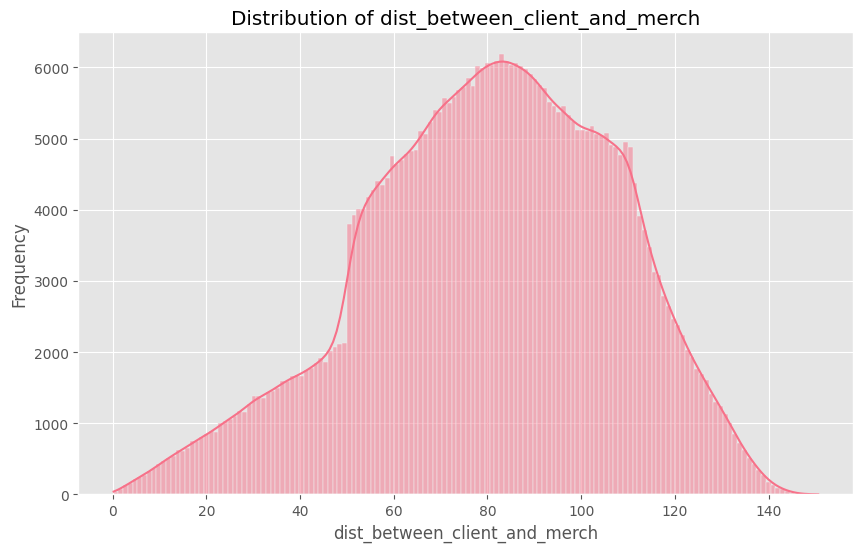

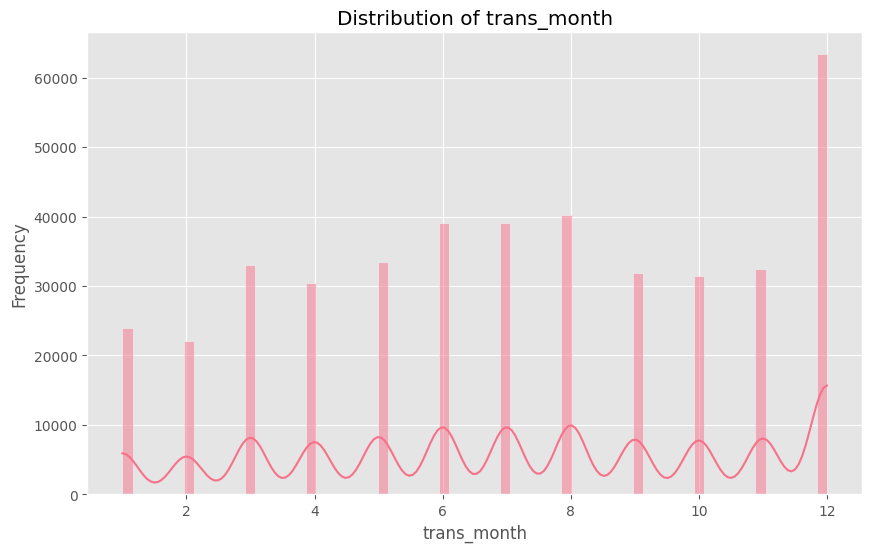

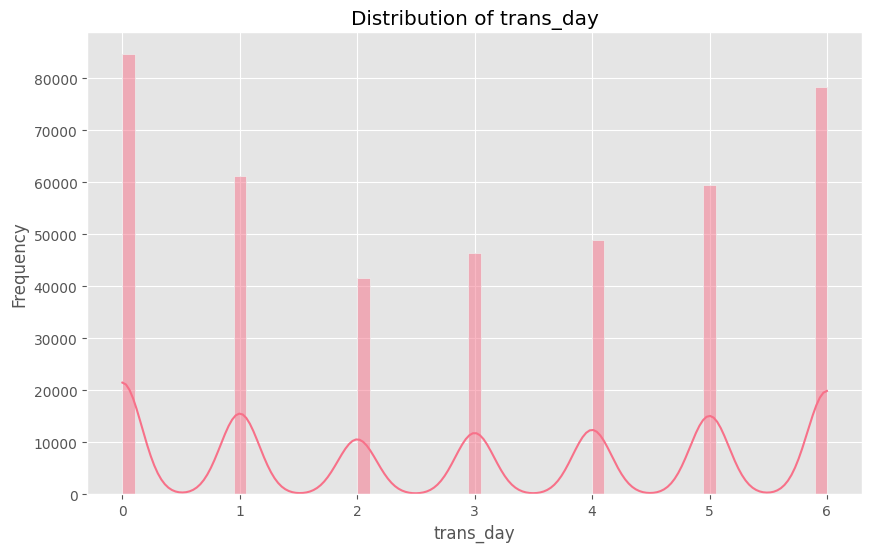

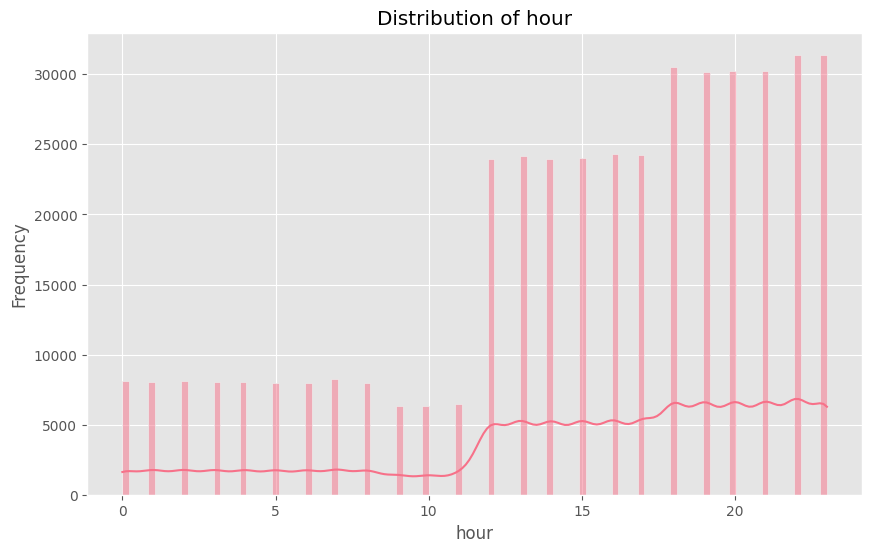

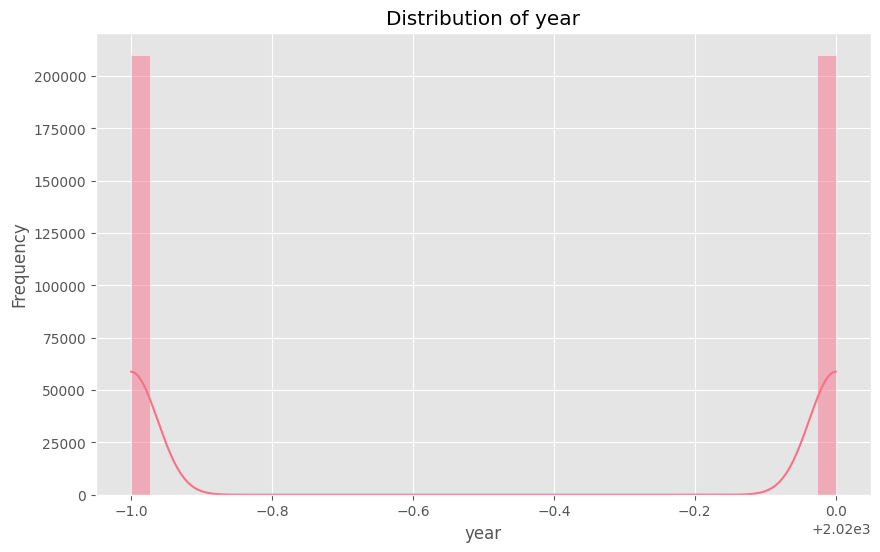

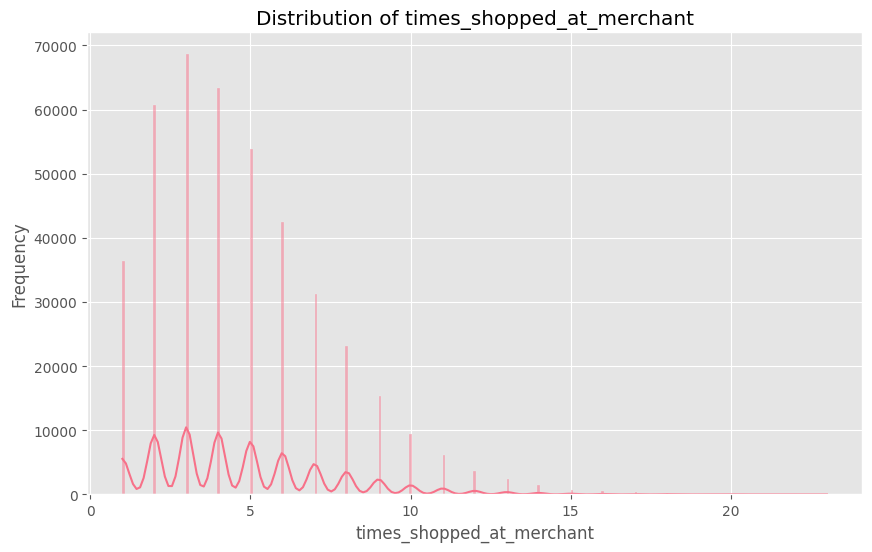

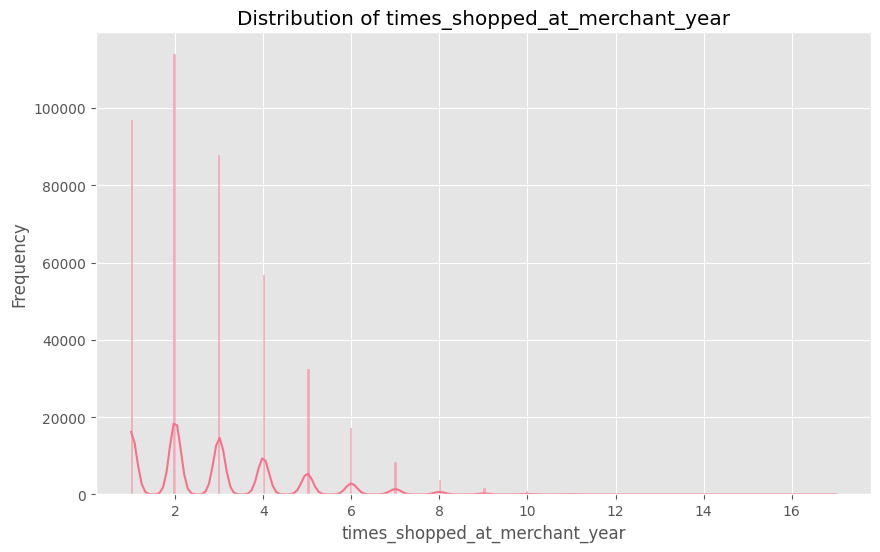

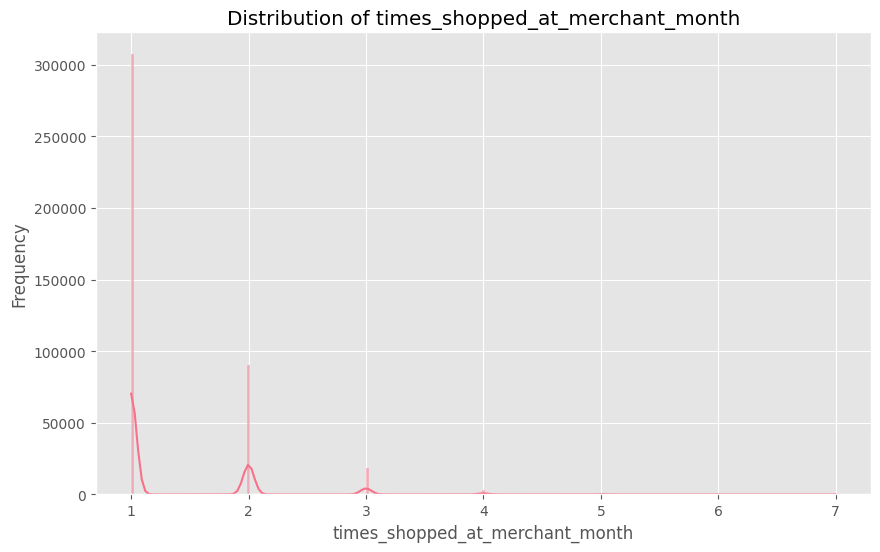

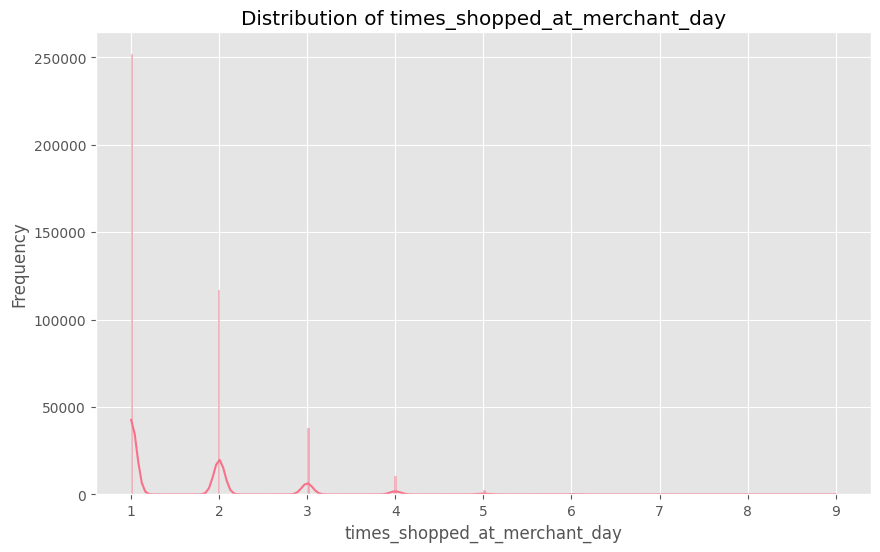

In [69]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=mobile_df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Fraud Distribution Analysis

is_fraud
0    0.993279
1    0.006721
Name: proportion, dtype: float64


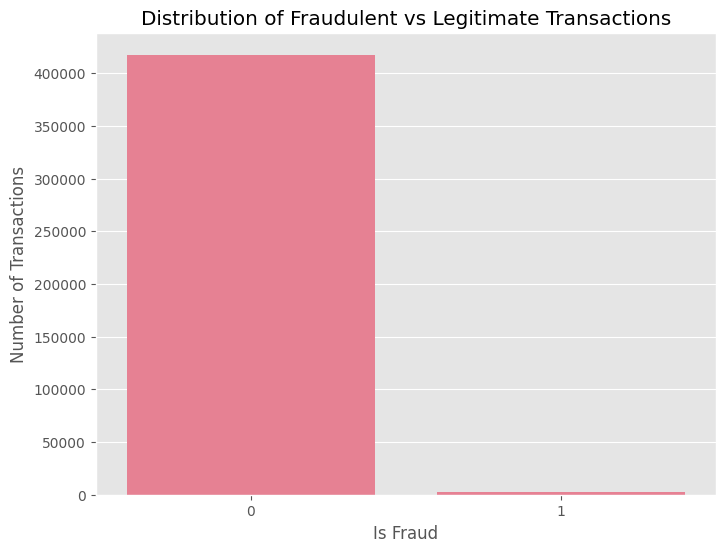

In [70]:
fraud_distribution = mobile_df['is_fraud'].value_counts(normalize=True)
print(fraud_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(data=mobile_df, x='is_fraud')
plt.title('Distribution of Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.show()

### Correlation

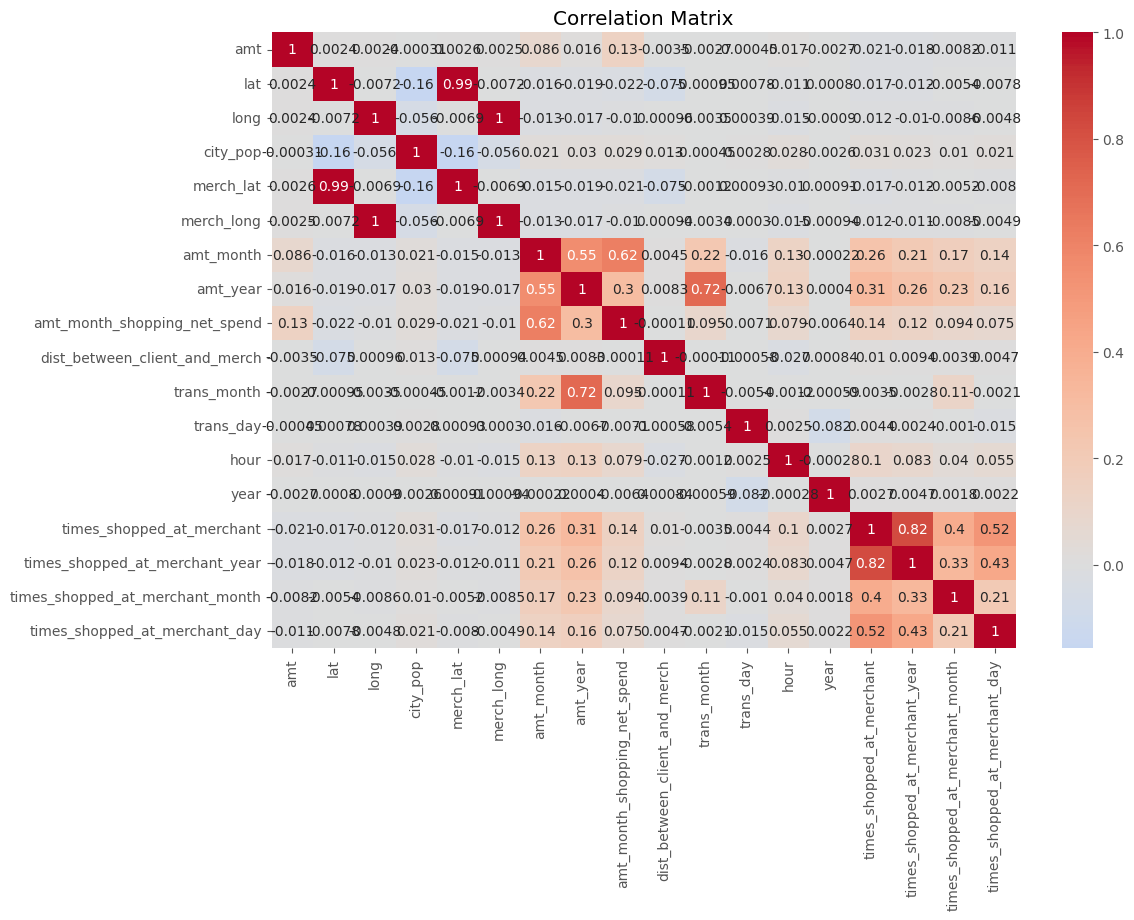

In [71]:
plt.figure(figsize=(12, 8))
correlation_matrix = mobile_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Since our dataset is unbalanced, this matrix might not be usefull. It will be replaced ahead.

In [72]:
print("\n=== Mobile Transactions Analysis ===")
    
print(f"Total mobile transactions: {len(mobile_df)}")

print("\n=== Mobile Transactions by Category ===")
print(mobile_df['category'].value_counts(normalize=True))

print("\n=== Mobile Transactions Fraud Rate ===")
mobile_fraud_rate = mobile_df['is_fraud'].mean()

print(f"Mobile fraud rate: {mobile_fraud_rate*100:.2f}%") 


=== Mobile Transactions Analysis ===
Total mobile transactions: 420304

=== Mobile Transactions by Category ===
category
shopping_net     0.305772
entertainment    0.288820
food_dining      0.281427
travel           0.123982
Name: proportion, dtype: float64

=== Mobile Transactions Fraud Rate ===
Mobile fraud rate: 0.67%


## Feature Engineering

### Train and test datasets

In [73]:
df_train = mobile_df[~((mobile_df['year'] == 2020) & (mobile_df['trans_month'] == 12))]
df_test = mobile_df[(mobile_df['year'] == 2020) & (mobile_df['trans_month'] == 12)]

In [74]:
print("Shape of test dataset:",df_test.shape)
print("Shape of train dataset:",df_train.shape)

Shape of test dataset: (31231, 36)
Shape of train dataset: (389073, 36)


In [75]:
X_train = df_train.drop('is_fraud', axis=1)
y_train = df_train['is_fraud']
X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

In [76]:
from datetime import datetime

In [77]:
def add_features(df):
    def calculate_age(dob):
        """Calculate age from date of birth"""
        today = datetime.now()
        birth_date = datetime.strptime(dob, '%Y-%m-%d')
        return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    
    # Convert date columns to datetime
    df['dob'] = pd.to_datetime(df['dob'])
    df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')
    
    # Calculate age
    df['age'] = df['dob'].apply(lambda x: calculate_age(x.strftime('%Y-%m-%d')))
    
    # Hourly spending rate
    df['hourly_spending_rate'] = df.groupby(['cc_num', 'hour'])['amt'].transform('mean')
    
    # Average distance per customer
    df['avg_distance_per_customer'] = df.groupby('cc_num')['dist_between_client_and_merch'].transform('mean')
    
    # Category frequency
    df['category_frequency'] = df.groupby(['cc_num', 'category'])['trans_num'].transform('count')
    
    # Category spending ratio
    total_spent = df.groupby('cc_num')['amt'].transform('sum')
    category_spent = df.groupby(['cc_num', 'category'])['amt'].transform('sum')
    df['category_spending_ratio'] = category_spent / total_spent
    
    # Time since last transaction
    df['time_since_last_trans'] = df.groupby('cc_num')['unix_time'].diff()
    
    # Transaction velocity (transactions per hour)
    df['trans_velocity'] = df.groupby(['cc_num', 'hour'])['trans_num'].transform('count')
    
    # Average transaction amount by category
    df['avg_category_amount'] = df.groupby(['cc_num', 'category'])['amt'].transform('mean')
    
    # Spending pattern deviation
    df['spending_deviation'] = (df['amt'] - df.groupby('cc_num')['amt'].transform('mean')) / df.groupby('cc_num')['amt'].transform('std')
    
    return df

In [78]:
X_train = add_features(X_train)

### Data preprocess

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [80]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [81]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [82]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [83]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

### Data augmentation

In [84]:
# Balance the dataset using Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
# separate features and target
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)
# print the number of samples in each class
print(f"Number of samples in each class: {y_train_balanced.value_counts()}")

/Users/andresmontoya/Documents/UVG/SecDS/Mobile-Apps-Fraud-Detection/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Number of samples in each class: is_fraud
0    386319
1    193159
Name: count, dtype: int64


### Feature Analysis for Classification

In [85]:
feature_names = preprocessor.get_feature_names_out()

if hasattr(X_train_balanced, 'toarray'):
    X_train_balanced = X_train_balanced.toarray()

X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=feature_names)

In [86]:
mi_scores = mutual_info_classif(X_train_balanced, y_train_balanced, random_state=42)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores = mi_scores.sort_values(ascending=False)

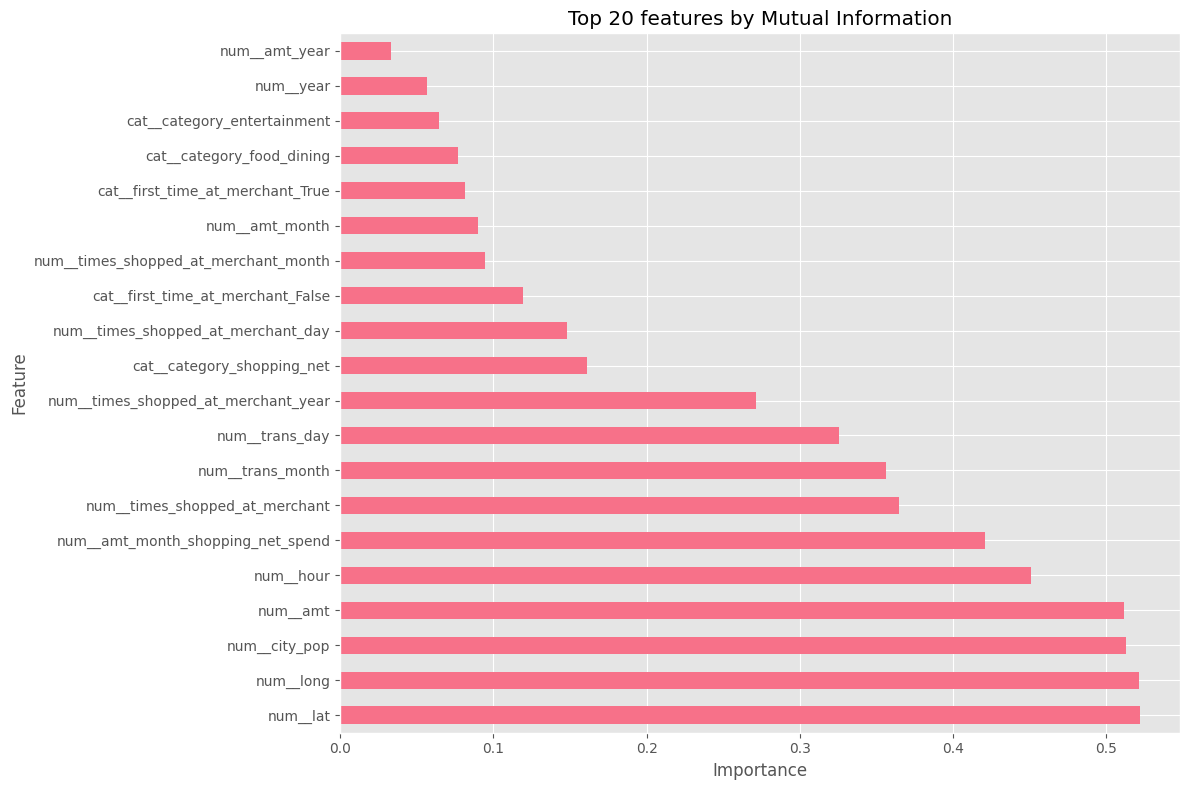

In [87]:
plt.figure(figsize=(12, 8))
mi_scores.head(20).plot(kind='barh')
plt.title('Top 20 features by Mutual Information')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [88]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

feature_importance = pd.Series(rf.feature_importances_, index=feature_names)
feature_importance = feature_importance.sort_values(ascending=False)

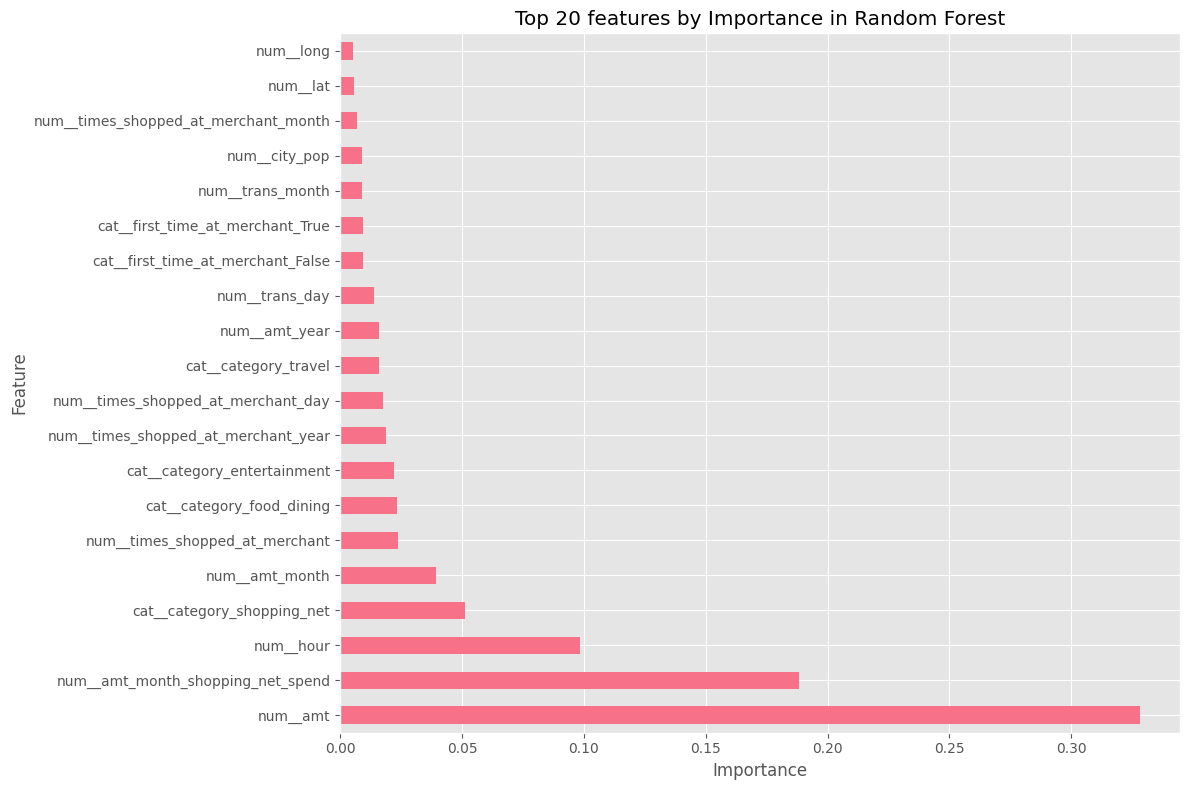

In [89]:
plt.figure(figsize=(12, 8))
feature_importance.head(20).plot(kind='barh')
plt.title('Top 20 features by Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

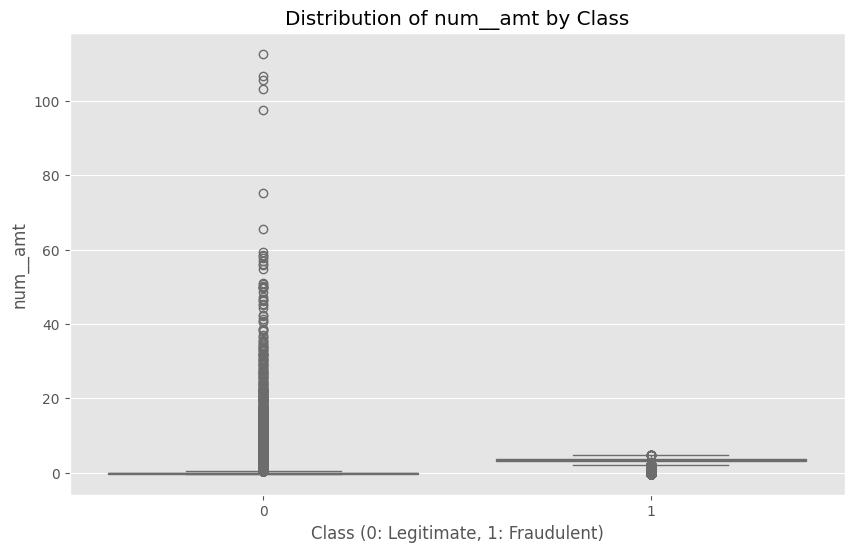

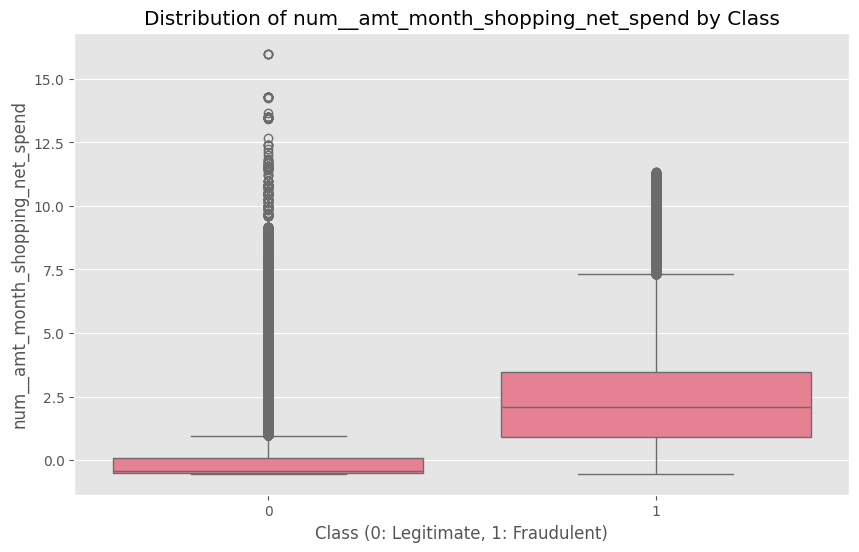

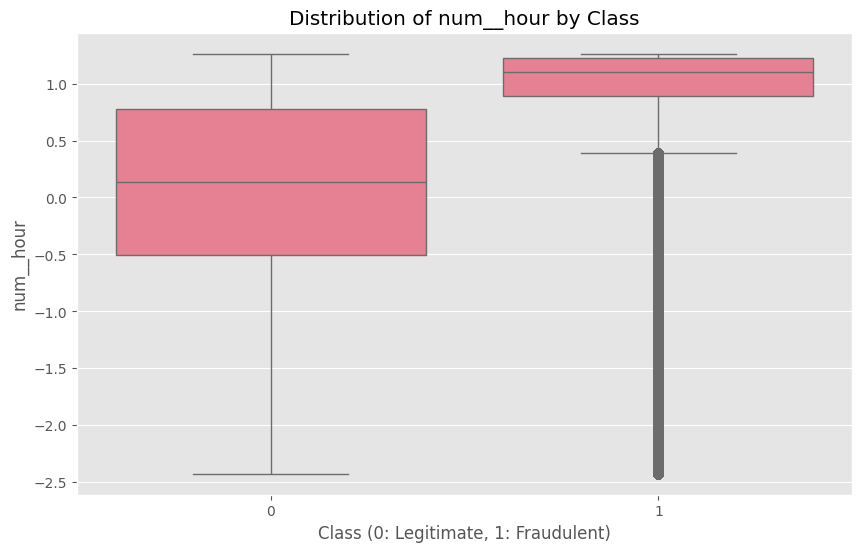

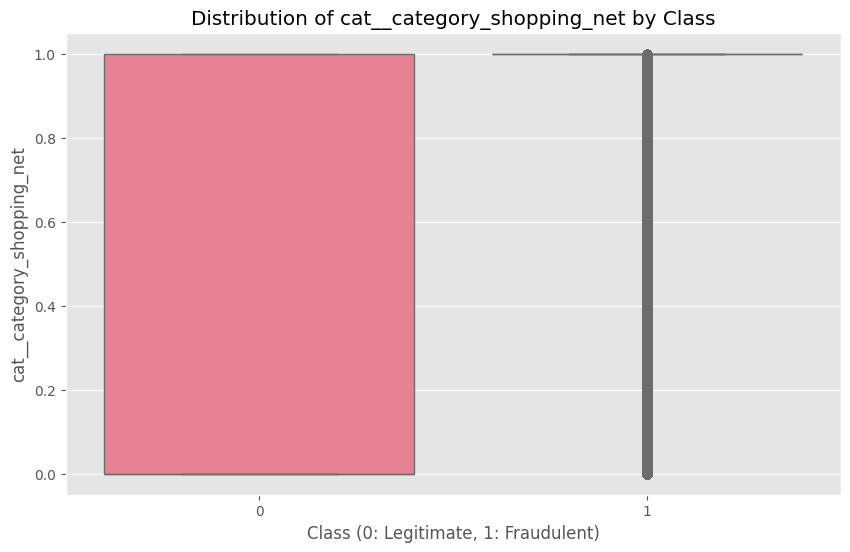

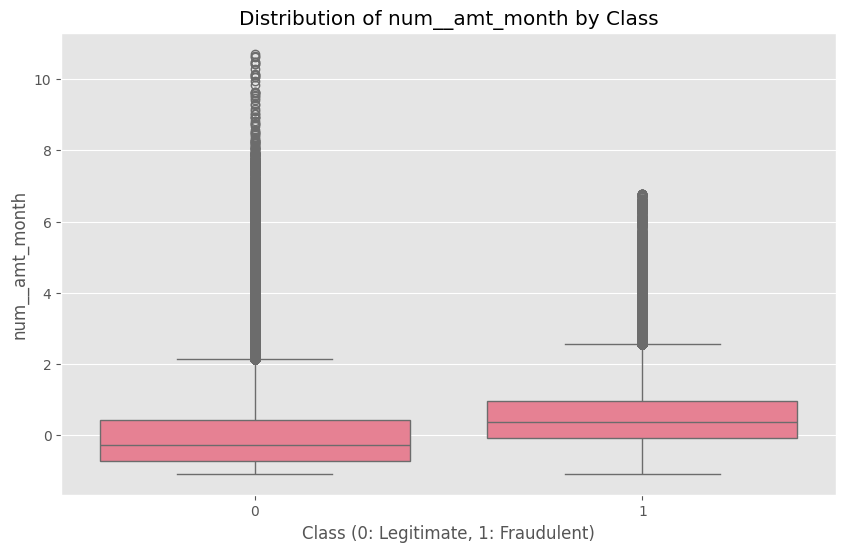

In [90]:
top_features = feature_importance.head(5).index

for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y_train_balanced, y=X_train_balanced_df[feature])
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
    plt.ylabel(feature)
    plt.show()

In [91]:
print("\nTop 10 features by Importance in Random Forest:")
print(feature_importance.head(10))


Top 10 features by Importance in Random Forest:
num__amt                               0.328204
num__amt_month_shopping_net_spend      0.188225
num__hour                              0.098582
cat__category_shopping_net             0.051391
num__amt_month                         0.039305
num__times_shopped_at_merchant         0.023929
cat__category_food_dining              0.023480
cat__category_entertainment            0.022263
num__times_shopped_at_merchant_year    0.018990
num__times_shopped_at_merchant_day     0.017419
dtype: float64


### Save the dataframes

In [92]:
if hasattr(X_test_preprocessed, 'toarray'):
    X_test_preprocessed = X_test_preprocessed.toarray()

In [93]:
X_test_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

In [94]:
X_train_balanced_df.to_csv('X_train_balanced.csv', index=False)
pd.DataFrame(y_train_balanced, columns=['is_fraud']).to_csv('y_train_balanced.csv', index=False)

In [95]:
X_test_df.to_csv('X_test.csv', index=False)
pd.DataFrame(y_test, columns=['is_fraud']).to_csv('y_test.csv', index=False)

In [96]:
pd.DataFrame(feature_names, columns=['feature_name']).to_csv('feature_names.csv', index=False)

## Model

In [97]:
import lightgbm as lgb
import pandas as pd

In [98]:
X_train = pd.read_csv('X_train_balanced.csv')
y_train = pd.read_csv('y_train_balanced.csv')['is_fraud']
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')['is_fraud']


In [99]:
def clean_feature_names(df):
    """Clean feature names to be compatible with LightGBM"""
    new_columns = []
    for col in df.columns:
        # Replace double underscores with single underscore
        new_col = col.replace('__', '_')
        # Remove or replace other special characters if needed
        new_col = new_col.replace(',', '')
        new_col = new_col.replace("'", '')
        new_col = new_col.replace('"', '')
        new_col = new_col.replace('(', '')
        new_col = new_col.replace(')', '')
        new_col = new_col.replace(' ', '_')
        new_col = new_col.replace('-', '_')
        new_columns.append(new_col)
    
    df.columns = new_columns
    return df

In [100]:
X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

In [101]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    
    # Increased complexity reduction
    'num_leaves': 7,  # Reduced from 15
    'max_depth': 3,    # Reduced from 5
    
    # Lower learning rate
    'learning_rate': 0.005,  # Reduced from 0.01
    
    # Stronger regularization
    'lambda_l1': 2.0,  # Increased from 1.0
    'lambda_l2': 2.0,  # Increased from 1.0
    'min_child_weight': 20.0,  # Increased from 10.0
    'min_data_in_leaf': 100,    # Increased from 50
    
    # More aggressive feature and data subsampling
    'feature_fraction': 0.4,  # Reduced from 0.6
    'bagging_fraction': 0.4,  # Reduced from 0.6
    'bagging_freq': 3,  # Reduced from 5
    
    # Additional regularization
    'max_bin': 63,  # Reduced from 127
    'min_gain_to_split': 0.05,  # Increased from 0.02
    
    'verbose': -1,
    'seed': 42
}

In [102]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[4]	training's auc: 0.985506	valid_1's auc: 0.980664


In [103]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [104]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    lgb.LGBMClassifier(**params, n_estimators=300),
    X_train, y_train,
    cv=cv,
    scoring='roc_auc',
    verbose=1
)

In [105]:
print(f"\nCross-validation AUC scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Cross-validation AUC scores: [0.99499095 0.99506458 0.99501091 0.9949751  0.99511425]
Mean CV AUC: 0.9950 (+/- 0.0001)


In [106]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

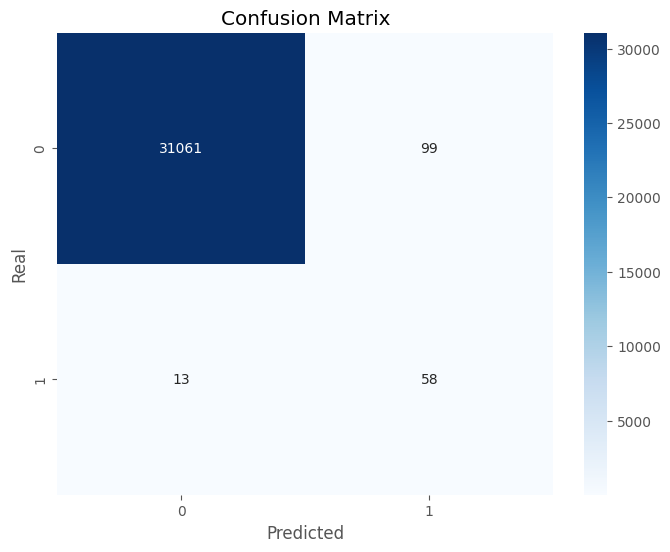


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31160
           1       0.00      0.00      0.00        71

    accuracy                           1.00     31231
   macro avg       0.50      0.50      0.50     31231
weighted avg       1.00      1.00      1.00     31231



/Users/andresmontoya/Documents/UVG/SecDS/Mobile-Apps-Fraud-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andresmontoya/Documents/UVG/SecDS/Mobile-Apps-Fraud-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andresmontoya/Documents/UVG/SecDS/Mobile-Apps-Fraud-Detection/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

In [157]:
cm = confusion_matrix(y_test, y_pred > 0.338)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred > 0.5))

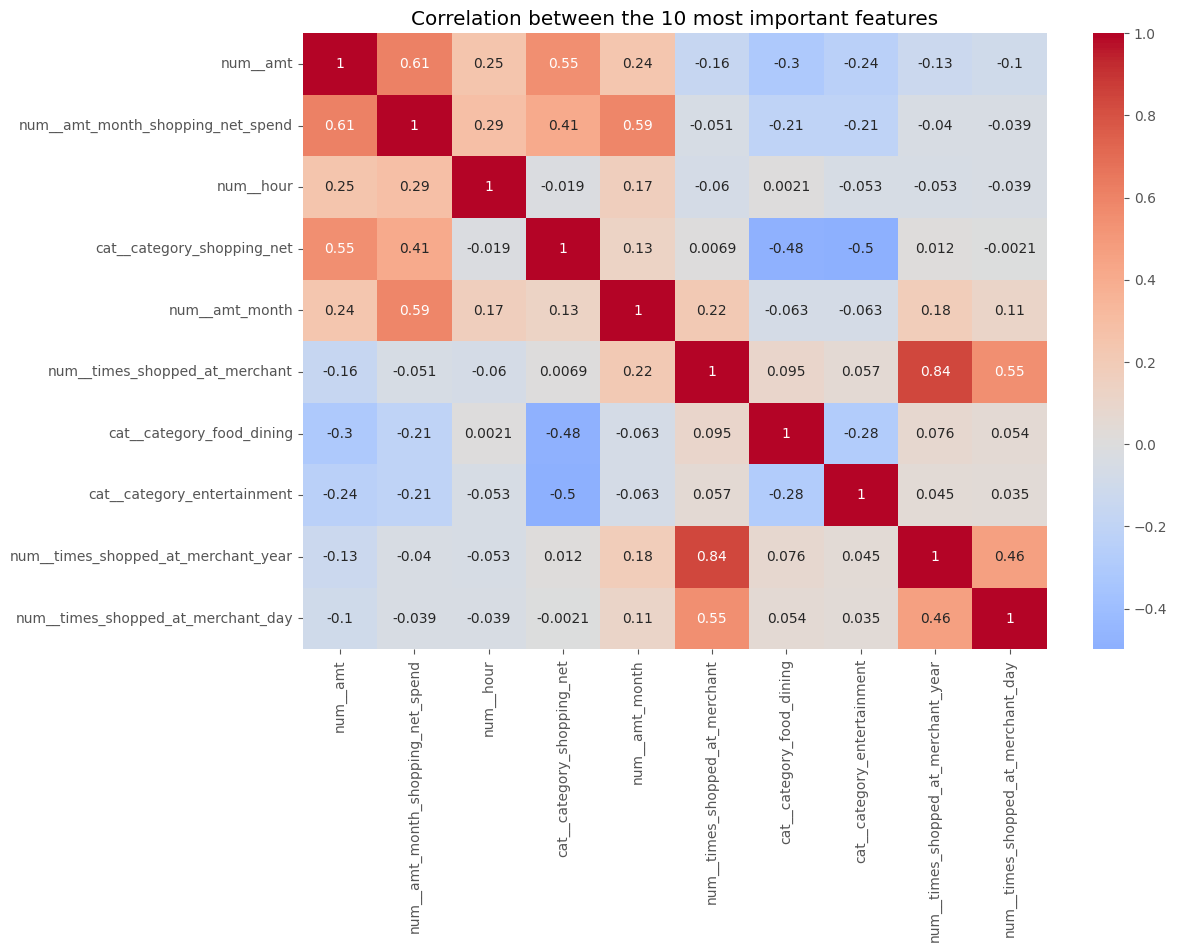

In [139]:
top_features = feature_importance.head(10).index
correlation_matrix = X_train_balanced_df[top_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between the 10 most important features')
plt.show()

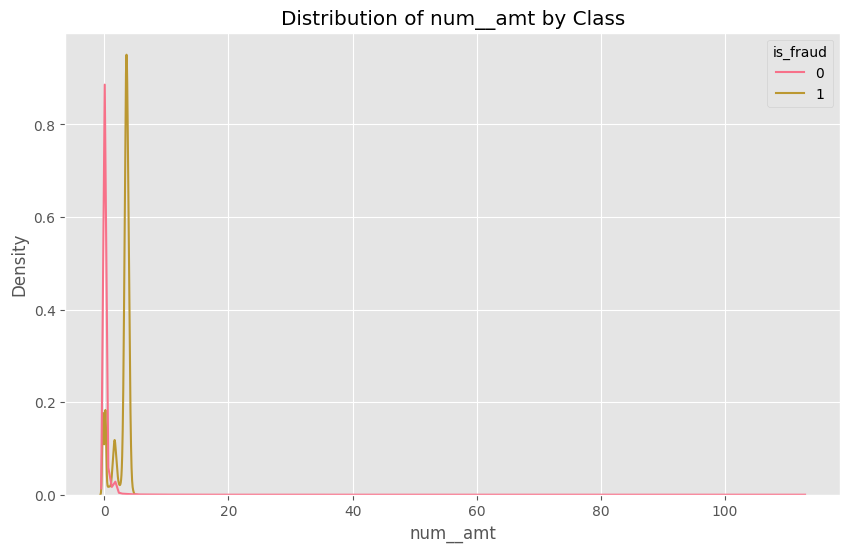

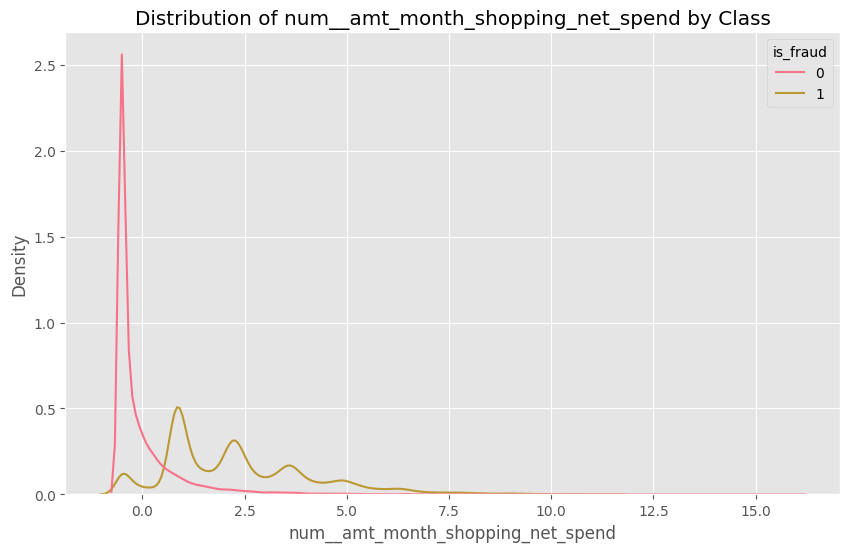

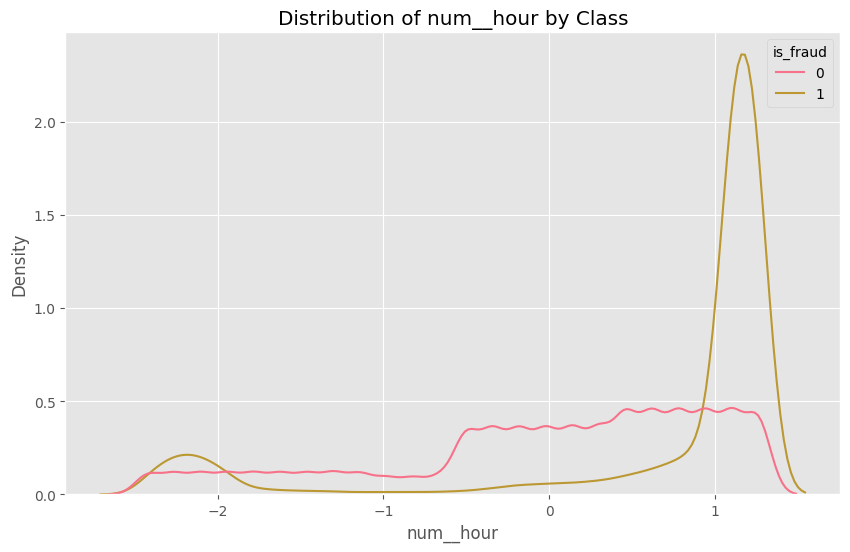

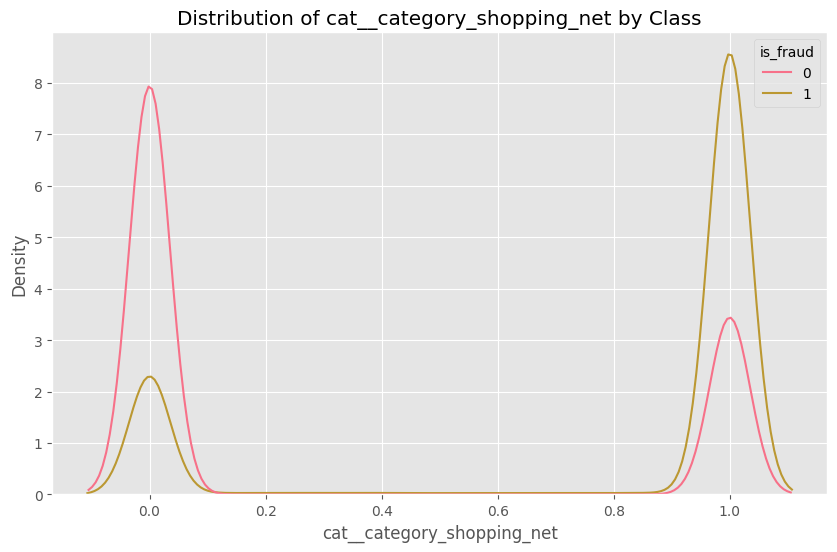

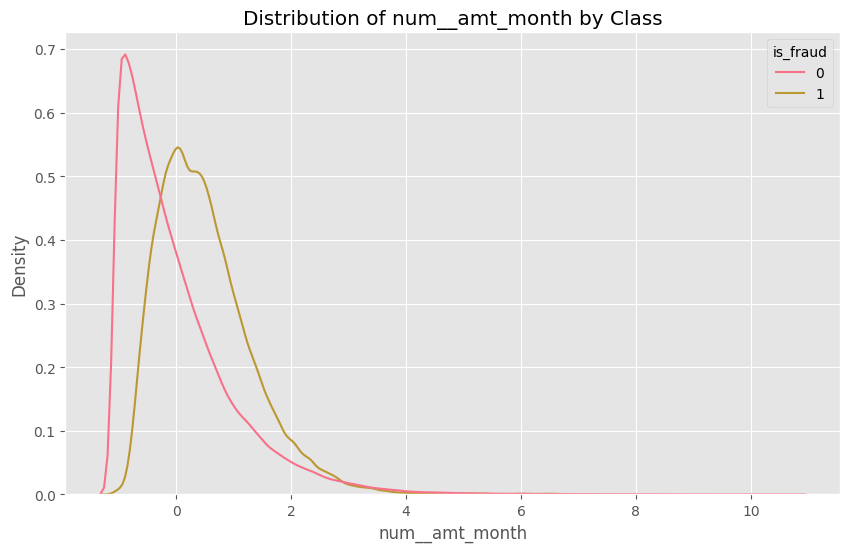

In [140]:
for feature in top_features[:5]:  # Analizamos las 5 más importantes
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=X_train_balanced_df, x=feature, hue=y_train_balanced, common_norm=False)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

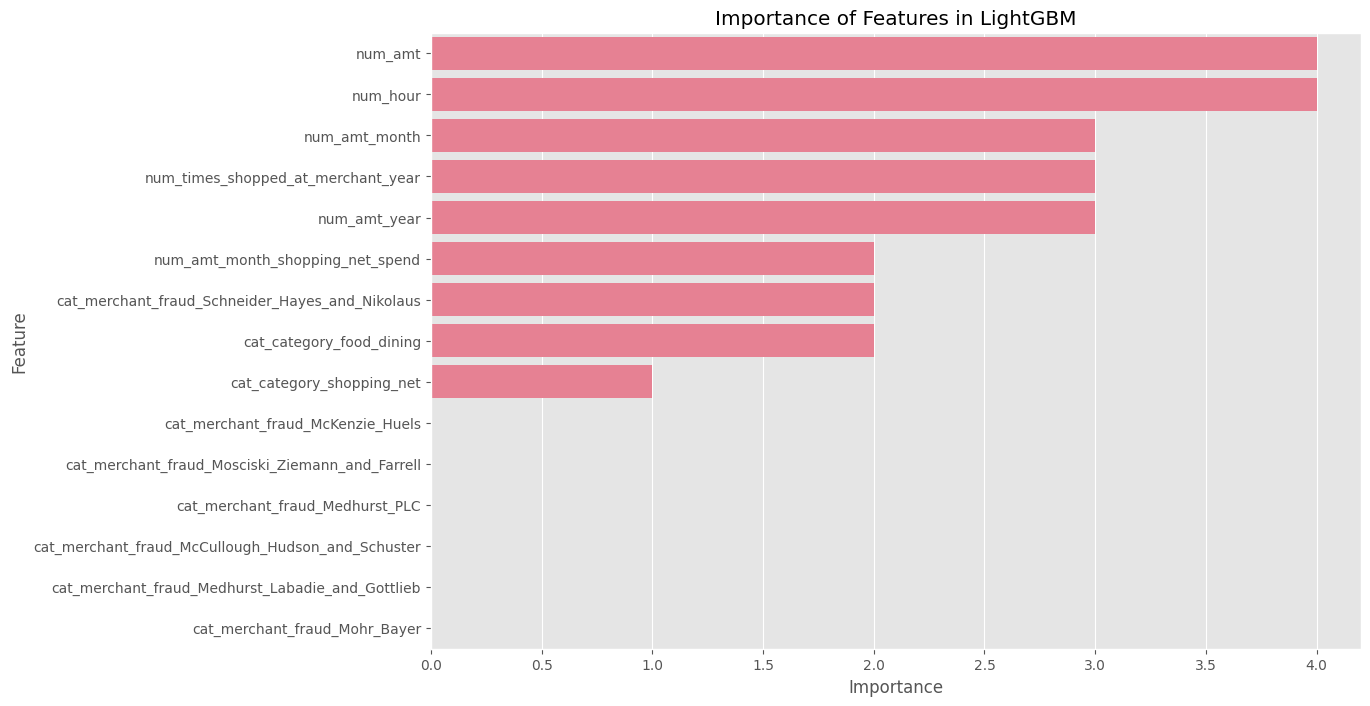

In [141]:
lgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importance()
})
lgb_importance = lgb_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=lgb_importance.head(15), x='importance', y='feature')
plt.title('Importance of Features in LightGBM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

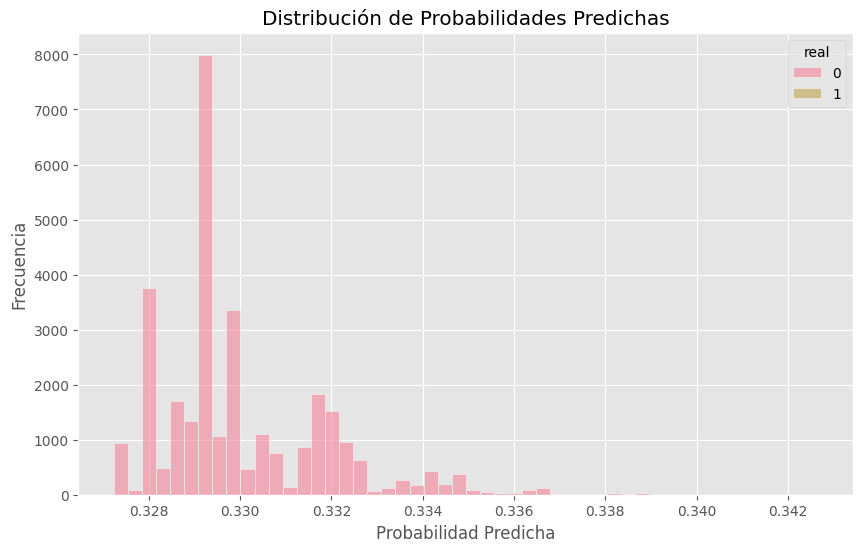

In [142]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pd.DataFrame({'pred': y_pred, 'real': y_test}), x='pred', hue='real', bins=50)
plt.title('Distribución de Probabilidades Predichas')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.show()

In [143]:
#probar SMOTE con un balanceo 1:5, por cada fraudulento, 5 legítimos.
#probar con undersampling